# Lags and Autocorrelation

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', mpl.__version__)
print('statsmodels', sm.__version__)

numpy 2.2.2
pandas 2.2.3
matplotlib 3.10.0
statsmodels 0.14.4


### KNMI Daggegevens

https://www.knmi.nl/nederland-nu/klimatologie/daggegevens

In [32]:
filename = '../datasets/knmi.csv'

df = pd.read_csv(filename, 
                 skiprows=10, 
                 skipinitialspace=True)

df.rename(columns={'# STN': 'STN'}, inplace=True)

df['dd'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
df[['TG', 'TN', 'TX']] /= 10

df = df.drop(['YYYYMMDD', 'STN'], axis='columns').set_index('dd')

now = pd.Timestamp.now()
start = now - pd.DateOffset(years=10)
df_recent = df.loc[start:now]

df_recent

,TG,TN,TX
dd,,,
2015-02-09,5.7,4.4,7.2
2015-02-10,5.7,4.6,7.2
2015-02-11,4.2,3.1,5.4
2015-02-12,2.6,-0.3,4.5
2015-02-13,4.6,-0.3,9.9
...,...,...,...
2025-02-01,0.0,-3.8,6.5
2025-02-02,-1.3,-5.4,4.4
2025-02-03,0.4,-5.1,6.1


In [33]:
temperature_daily = df_recent['TG'] 
temperature_weekly = temperature_daily.resample('W').mean()

In [34]:
def plot_temperature(df=None, linewidth=1, color='darkcyan', title='Temperature in the last 10 years'):
    fig, ax = plt.subplots(figsize=(12, 5))

    ax.set_facecolor('snow')
    ax.grid()
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(title)
    ax.set_ylabel('Temperature (°C)')

    ax.plot(df, label='Temperature', linewidth=linewidth, color=color)

    ax.legend()

    plt.show()

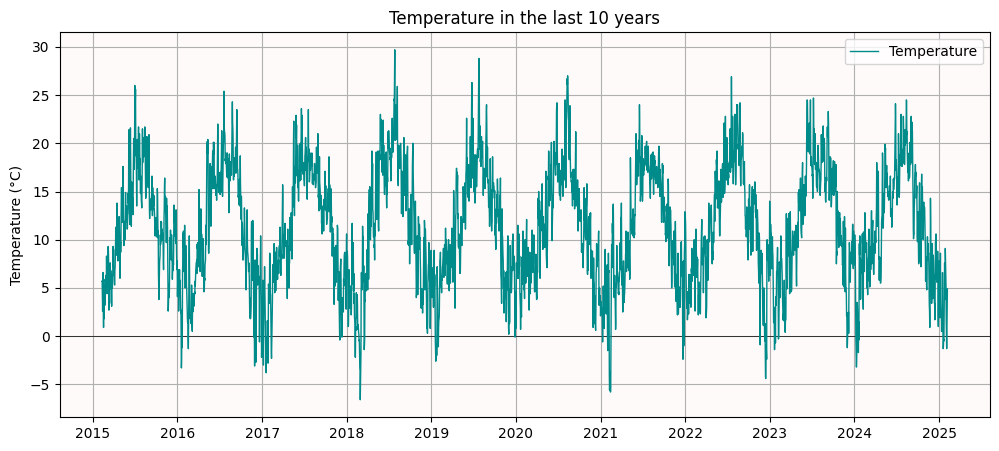

In [35]:
plot_temperature(temperature_daily)

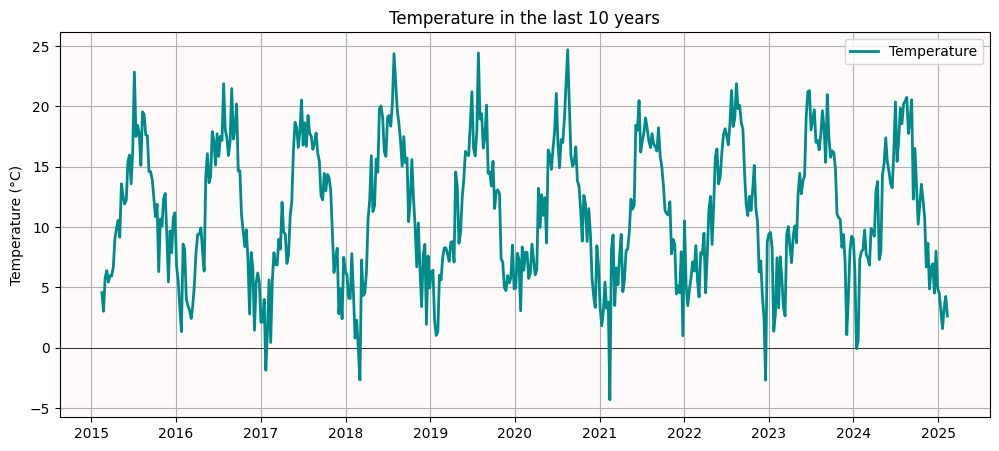

In [36]:
plot_temperature(temperature_weekly, linewidth=2)

### Lag Plot

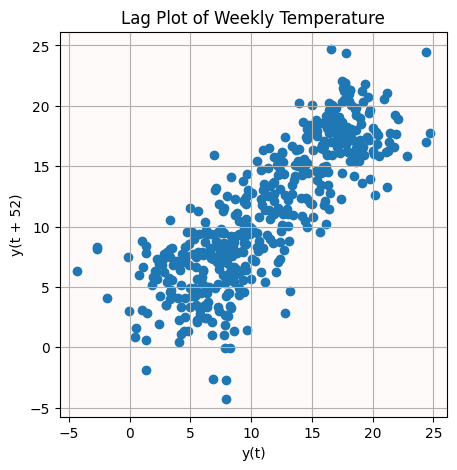

In [37]:
from pandas.plotting import lag_plot

fig, ax = plt.subplots(figsize=(5, 5))

ax.set_facecolor('snow')
ax.grid()
ax.set_title('Lag Plot of Weekly Temperature')
ax.set_ylabel('Temperature (°C)')

lag_plot(temperature_weekly, lag=52)

plt.show()

### Autocorrelation

In [38]:
lag = 52

df_shifted = pd.concat([temperature_weekly.shift(lag), temperature_daily], axis=1)
df_shifted.columns = ['t-1', 't']

result = df_shifted.corr()

print(result)

          t-1         t
t-1  1.000000  0.760144
t    0.760144  1.000000


In [39]:
temperature_weekly.autocorr(lag=lag)

np.float64(0.8233630568585352)

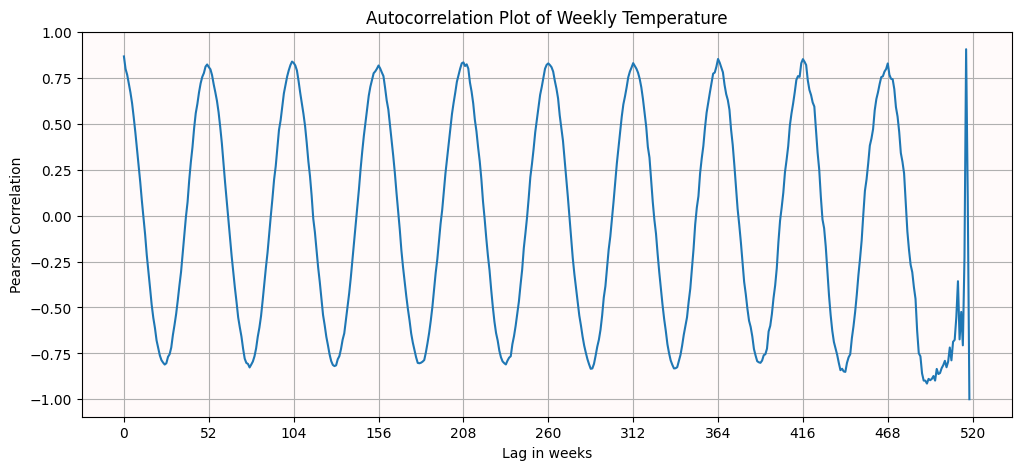

In [40]:
lags = range(1, 520)

autocorrelations = np.array([temperature_weekly.autocorr(lag=lag) for lag in lags])

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_facecolor('snow')
ax.grid()
ax.set_title('Autocorrelation Plot of Weekly Temperature')
ax.set_xlabel('Lag in weeks')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(range(0, 550, 52))

plt.plot(autocorrelations)

plt.show()

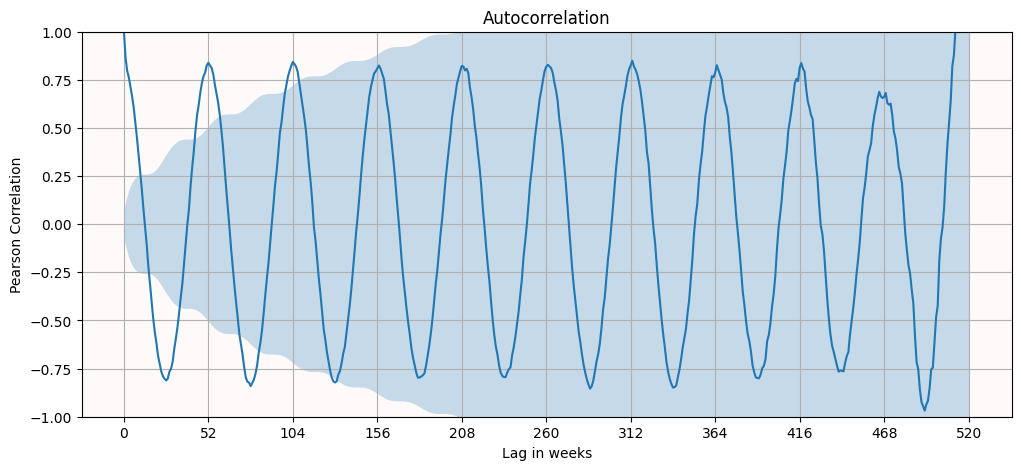

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.set_facecolor('snow')
ax.grid()
ax.set_title('Autocorrelation Plot of Weekly Temperature')
ax.set_xlabel('Lag in weeks')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(range(0, 550, 52))

sm.graphics.tsa.plot_acf(temperature_weekly, lags=520, adjusted=True, linestyle='-', marker=None, use_vlines=False, ax=ax)

plt.show()

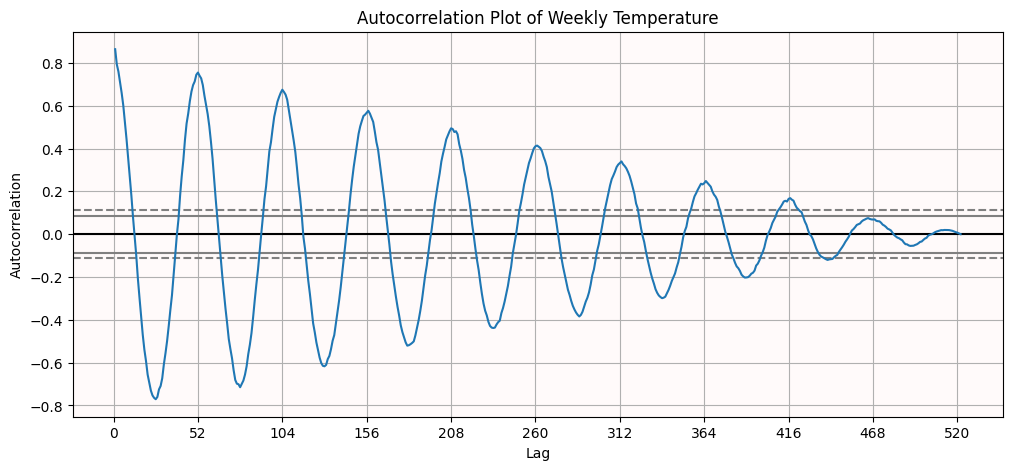

In [44]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_facecolor('snow')
ax.grid()
ax.set_title('Autocorrelation Plot of Weekly Temperature')
ax.set_xlabel('Lag in weeks')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(range(0, 550, 52))
ax.grid()

autocorrelation_plot(temperature_weekly, ax=ax)

plt.show()

### Correlogram

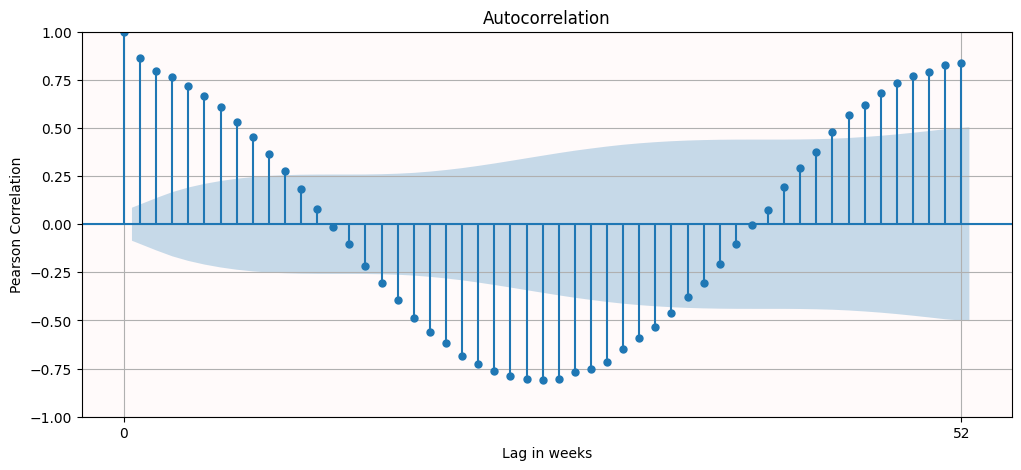

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.set_facecolor('snow')
ax.grid()
ax.set_title('Autocorrelation Plot of Weekly Temperature')
ax.set_xlabel('Lag in weeks')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(range(0, 550, 52))

sm.graphics.tsa.plot_acf(temperature_weekly, lags=52, adjusted=True, ax=ax)

plt.show()